## Video 31: How do I merge dataframes in Pandas??

Lessons covered in this lecture:
    
    1. Selecting a function: Which function should you select to merge the dataframes and when.
    2. Joining (Merging) the dataframes'
    3. What if??? These are common variations of basic merge.
    4. Four types of joins.

Different types of functions related to merging

1. df1.append(df2): Stacking vertically
2. pd.concat([df1,df2]): 
    
    stacking horizontally or vertically
    
    simple inner outer joins on indexes
3. df1.join(df2): inner, outer, left or right joins on indexes
4. pd.merge([df1, df2]): many joins on multiple columns

Recommendation:
    
    1. Use concat and dont use append (Both have same functionality but concat is more flexible)
    2. Use merge and dont use join (Both have same functionality but merge is more flexible)

Part 2: Joining (Merging) Dataframes
    
Using movielens 100k data, lets create 2 dataframes:
    
    1. Movies: shows information regarding movies, namely a unique movie_id and its title
    
    2. ratings: shows the ratings that a particular user_id gave to a particular movie_id at a particular time stamp.

In [2]:
import pandas as pd

Step 1:
    Dataframe of movies has been created
    
Step 2: 
    Dataframe of ratings has been created
    
Step 3:
    Create a sub-set dataframe for all the users who have rated movie_id 1
    
Step 4:
    If we are merging 2 dataframes, what would be the point of merging the 2 dataframes?


## Merging Movies and Ratings

Lets pretend we want to examine the ratings dataframe. But we want to know the title of each movie rather than its movie_id
The best way to accomplish this objective is by joining(merging) dataframe using the Pandas merge function:

## Types of Joins

In [3]:
A = pd.DataFrame({"color": ["green", "yellow", "red"], "num" : [1,2,3]})

In [4]:
A

,color,num
0,green,1
1,yellow,2
2,red,3


In [5]:
B = pd.DataFrame({"color": ["green", "yellow", "pink"], "size": ["S", "M", "L"]})

In [6]:
B

,color,size
0,green,S
1,yellow,M
2,pink,L


#### Inner join

Inner join only includes a row in the result, if the thing you joined on is present in both the dataframes

Only include observations found in both A and B.

In [8]:
pd.merge(A,B, how = "inner")

,color,num,size
0,green,1,S
1,yellow,2,M


In [9]:
## As red was not found in B and pink was not found in A, neither of those have been included in the result dataframe.

### Outer Join

It includes all the rows present in both the datasets

Includes all the observations found in either A or B

In [10]:
pd.merge(A,B, how = "outer")

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,red,3.0,NaN
3,pink,NaN,L


In [11]:
# The missing values get automatically filled with NaN.

### Left Join

Includes all the observations present in first Dataframe

Includes all the observations present in A 

In [12]:
pd.merge(A,B, how="left")

,color,num,size
0,green,1,S
1,yellow,2,M
2,red,3,NaN


### Right Join

Includes all the observations present in second Dataframe

Includes all the observations present in B 

In [14]:
pd.merge(A,B, how = "right")

,color,num,size
0,green,1.0,S
1,yellow,2.0,M
2,pink,NaN,L


## Video 32: 4 new time saving tricks in Pandas.

In [15]:
import pandas as pd

In [16]:
pd.__version__

'0.24.2'

#### 1. Create a Date-time column from a DataFrame

In [17]:
# Create a reference dataframe

df = pd.DataFrame([[12, 25, 2017, 10],[1,15,2010,11]], columns = ["month", "Day", "Year", "hour"])

In [18]:
df

,month,Day,Year,hour
0,12,25,2017,10
1,1,15,2010,11


In [19]:
#new: It can create a datetime series from an entire dataframe

pd.to_datetime(df)

0   2017-12-25 10:00:00
1   2010-01-15 11:00:00
dtype: datetime64[ns]

In [20]:
#new: We can create a datetime column from a subset of columns in the entire dataframe

pd.to_datetime(df[["month","Day","Year","hour"]])

0   2017-12-25 10:00:00
1   2010-01-15 11:00:00
dtype: datetime64[ns]

In [21]:
# We can overwrite an index to create a date-time index

df.index = pd.to_datetime(df[["month","Day","Year","hour"]])

In [22]:
df

,month,Day,Year,hour
2017-12-25 10:00:00,12,25,2017,10
2010-01-15 11:00:00,1,15,2010,11


#### Trick 2: Create a Category column during file reading

In [23]:
# read the drinks dataset into a dataframe

import pandas as pd 
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [24]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [25]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [26]:
#old way of converting a series to category (after file reading)

drinks["continent"] = drinks.continent.astype("category")

In [27]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [31]:
# new way of converting a series to category (during file reading)

drinks = pd.read_csv("http://bit.ly/drinksbycountry", dtype={"continent" : "category"})

In [32]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

#### Trick 3: Convert the datatype of multiple columns at once.

In [33]:
#read the drinks dataset into a dataframe

drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [34]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [35]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [36]:
# Old way of converting dtypes (one at a time)

drinks["beer_servings"] = drinks.beer_servings.astype("float")
drinks["wine_servings"] = drinks.wine_servings.astype("float")
drinks["continent"] = drinks.continent.astype("category")

In [37]:
drinks.dtypes

country                           object
beer_servings                    float64
spirit_servings                    int64
wine_servings                    float64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [38]:
# New way to convert datatypes (All at once)

drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [39]:
drinks = drinks.astype({"beer_servings": "float", "continent": "category"})

In [40]:
drinks.dtypes

country                           object
beer_servings                    float64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

#### Trick 4: Apply multiple aggregations on a Series or DataFrame

In [43]:
# Example of a single aggregation function after groupby

drinks.groupby("continent").beer_servings.mean() 
# eg of aggregation funtions (min, max, mean, variance)

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [44]:
# Example of multiple aggregations

drinks.groupby("continent").beer_servings.agg(["min", "max", "mean"])

,min,max,mean
continent,,,
Africa,0.0,376.0,61.471698
Asia,0.0,247.0,37.045455
Europe,0.0,361.0,193.777778
North America,1.0,285.0,145.434783
Oceania,0.0,306.0,89.687500
South America,93.0,333.0,175.083333


In [46]:
## new: We can apply multiple aggregation to a pandas series

drinks.beer_servings.agg(["min","max","mean"])

min       0.000000
max     376.000000
mean    106.160622
Name: beer_servings, dtype: float64

In [47]:
## new: We can apply multiple aggregation to a pandas dataframe

drinks.agg(["min","max","mean"])

## min and max for object series are in alphabetical orders. Hence there is no mean for object series

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
min,Afghanistan,0.000000,0.000000,0.000000,0.000000
max,Zimbabwe,376.000000,438.000000,370.000000,14.400000
mean,NaN,106.160622,80.994819,49.450777,4.717098


In [48]:
# Dataframe describe method provides the same funtionality but is less flexible

drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [49]:
# In agg we can define what calculations we want to see. In describe we dont have that option

## There is a Pandas CHEAT SHEET. link in description of video 32

## Video 33: How do I use multi-index in pandas?

In [1]:
import pandas as pd

In [2]:
stocks = pd.read_csv("http://bit.ly/smallstocks")

In [3]:
stocks.head()

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT


In [4]:
stocks.shape

(9, 4)

In [5]:
stocks.index

RangeIndex(start=0, stop=9, step=1)

In [9]:
stocks.groupby("Symbol").Close.mean()

Symbol
AAPL    112.856667
CSCO     31.480000
MSFT     57.433333
Name: Close, dtype: float64

In [11]:
ser = stocks.groupby(["Symbol", "Date"]).Close.mean()

In [12]:
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [13]:
ser.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['Symbol', 'Date'])

A multi-index adds another dimension to our data. A series is like 1 dimension. A series with multi-index is 2D. A dataframe with single index is 2D but with multi-index it becomes 3D.

In [15]:
# If we unstack a multi-index series, it becomes a data-frame

ser.unstack()

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


In [16]:
# There is another way of getting the above table

stocks.pivot_table(values = "Close", index = "Symbol", columns = "Date")

Date,2016-10-03,2016-10-04,2016-10-05
Symbol,,,
AAPL,112.52,113.00,113.05
CSCO,31.50,31.35,31.59
MSFT,57.42,57.24,57.64


### Selection from an multi-index series. 


This will help us in understanding selection from an multi-index dataframe. 

In [17]:
ser

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
        2016-10-05    113.05
CSCO    2016-10-03     31.50
        2016-10-04     31.35
        2016-10-05     31.59
MSFT    2016-10-03     57.42
        2016-10-04     57.24
        2016-10-05     57.64
Name: Close, dtype: float64

In [18]:
# Suppose we want to select all the apple data.

ser.loc["AAPL"]

# For selecting in a multi-index series, we have to mention the outer level and it will select all the data under that level. 

Date
2016-10-03    112.52
2016-10-04    113.00
2016-10-05    113.05
Name: Close, dtype: float64

In [19]:
# Suppose we wanted the closing price for apple on 4/10/2016

ser.loc["AAPL", "2016-10-04"]

113.0

In [20]:
# We can also select the data just from the dates

ser.loc[:, "2016-10-03"] # : stands for all the out level

Symbol
AAPL    112.52
CSCO     31.50
MSFT     57.42
Name: Close, dtype: float64

In [21]:
# Whether or not, your multi level index is represented as a series or dataframe, its selection process remains the same.

In [22]:
# Dataframe with a multi-index

stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [23]:
#Converting the above dataset to multi-index

stocks.set_index(["Symbol", "Date"], inplace = True)

In [24]:
stocks

,,Close,Volume
Symbol,Date,,
CSCO,2016-10-03,31.50,14070500
AAPL,2016-10-03,112.52,21701800
MSFT,2016-10-03,57.42,19189500
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900
CSCO,2016-10-04,31.35,18460400
MSFT,2016-10-05,57.64,16726400
CSCO,2016-10-05,31.59,11808600
AAPL,2016-10-05,113.05,21453100


In [25]:
stocks.index

MultiIndex(levels=[['AAPL', 'CSCO', 'MSFT'], ['2016-10-03', '2016-10-04', '2016-10-05']],
           codes=[[1, 0, 2, 0, 2, 1, 2, 1, 0], [0, 0, 0, 1, 1, 1, 2, 2, 2]],
           names=['Symbol', 'Date'])

In [26]:
# Sorting the data

stocks.sort_index(inplace = True)

In [27]:
stocks

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [28]:
# Selection from multi-index dataframe

stocks.loc["AAPL"]

,Close,Volume
Date,,
2016-10-03,112.52,21701800
2016-10-04,113.00,29736800
2016-10-05,113.05,21453100


In [29]:
# Selecting the closing amt and Volume for apple on 4/10/2016

stocks.loc[("AAPL", "2016-10-03"), :] 
# The values under () are rows. For multi-indexing, it has to be passed as a tauple () to avoid any confusion.

Close          112.52
Volume    21701800.00
Name: (AAPL, 2016-10-03), dtype: float64

In [30]:
# Selecting just the closing amt for apple on 4/10/2016

stocks.loc[("AAPL", "2016-10-03"), "Close"]

112.52

In [31]:
# What if we want to get data from multiple stocks say AAPL and MSFT

stocks.loc[(["AAPL", "MSFT"], "2016-10-04"),:]

,,Close,Volume
Symbol,Date,,
AAPL,2016-10-04,113.00,29736800
MSFT,2016-10-04,57.24,20085900


In [32]:
stocks.loc[(["AAPL", "MSFT"], "2016-10-04"),"Close"]

Symbol  Date      
AAPL    2016-10-04    113.00
MSFT    2016-10-04     57.24
Name: Close, dtype: float64

In [33]:
# We want to multipe dates and single company

stocks.loc[("MSFT", ["2016-10-04", "2016-10-03"]),"Close"]

Symbol  Date      
MSFT    2016-10-03    57.42
        2016-10-04    57.24
Name: Close, dtype: float64

In [35]:
# We want to multipe dates and multiple companies

stocks.loc[(["MSFT", "AAPL"], ["2016-10-04", "2016-10-03"]),"Close"]

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [36]:
# For any level, if we want all the values of that level, we have to use "slice(None)"

stocks.loc[(slice(None), ["2016-10-04", "2016-10-03"]),"Close"]

Symbol  Date      
AAPL    2016-10-03    112.52
        2016-10-04    113.00
CSCO    2016-10-03     31.50
        2016-10-04     31.35
MSFT    2016-10-03     57.42
        2016-10-04     57.24
Name: Close, dtype: float64

In [41]:
import pandas as pd

In [53]:
close = pd.read_csv("http://bit.ly/smallstocks", usecols = [0,3,1], index_col = ["Symbol", "Date"]).sort_index()

In [54]:
close

Close
Symbol Date              
AAPL   2016-10-03  112.52
       2016-10-04  113.00
       2016-10-05  113.05
CSCO   2016-10-03   31.50
       2016-10-04   31.35
       2016-10-05   31.59
MSFT   2016-10-03   57.42
       2016-10-04   57.24
       2016-10-05   57.64

In [50]:
volume = pd.read_csv("http://bit.ly/smallstocks", usecols = [0,3,2], index_col = ["Symbol", "Date"]).sort_index()

In [52]:
volume

Volume
Symbol Date                
AAPL   2016-10-03  21701800
       2016-10-04  29736800
       2016-10-05  21453100
CSCO   2016-10-03  14070500
       2016-10-04  18460400
       2016-10-05  11808600
MSFT   2016-10-03  19189500
       2016-10-04  20085900
       2016-10-05  16726400

In [61]:
# To merge 2 multi-index dataframes with same index and different columns, we will use the .merge() method

both = pd.merge(close, volume, left_index = True, right_index = True)
both
# The merge is done on index of close dataset(left_index) and volume dataset(right_index)
# If there would have been any missing values, then we would have to select the type of merge (inner, outer, left, right)

Close    Volume
Symbol Date                        
AAPL   2016-10-03  112.52  21701800
       2016-10-04  113.00  29736800
       2016-10-05  113.05  21453100
CSCO   2016-10-03   31.50  14070500
       2016-10-04   31.35  18460400
       2016-10-05   31.59  11808600
MSFT   2016-10-03   57.42  19189500
       2016-10-04   57.24  20085900
       2016-10-05   57.64  16726400

In [62]:
# To convert the above dataset to the single index dataset
import pandas as pd
both.reset_index()

,Symbol,Date,Close,Volume
0,AAPL,2016-10-03,112.52,21701800
1,AAPL,2016-10-04,113.00,29736800
2,AAPL,2016-10-05,113.05,21453100
3,CSCO,2016-10-03,31.50,14070500
4,CSCO,2016-10-04,31.35,18460400
5,CSCO,2016-10-05,31.59,11808600
6,MSFT,2016-10-03,57.42,19189500
7,MSFT,2016-10-04,57.24,20085900
8,MSFT,2016-10-05,57.64,16726400


## Video 34: 5 new changes in Pandas we need to know about

In [ ]:
deprecated means pandas is asking us to stop using this function.

### 1. ix has been deprecated 


In [63]:
import pandas as pd

In [64]:
pd.__version__

'0.24.2'

In [68]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry", index_col = "country")

In [69]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [70]:
# loc access by label
drinks.loc["Angola", "wine_servings"]

45

In [71]:
#iloc accesses by position
drinks.iloc[4,1]

57

In [72]:
#ix accesses using label and position. (newly deprecated)

drinks.ix["Angola", 2]

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


45

##### Instead of using ix, we can use the following 2 alternatives

In [73]:
#1. use loc in following way

drinks.loc["Angola", drinks.columns[1]]

57

In [75]:
#2. Use iloc in the following way

drinks.iloc[drinks.index.get_loc("Angola"), 1]

57

In [76]:
# ix accesses by label and position

drinks.ix[4, "spirit_servings"]

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


57

In [78]:
# 1. alternate way of using loc

drinks.loc[drinks.index[4], "spirit_servings"]

57

In [81]:
# 2. alternate way of using iloc

drinks.iloc[4, drinks.columns.get_loc("spirit_servings")]

57

#### 2. Aliases have been added to isnull and notnull

In [82]:
import pandas as pd

In [83]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [84]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [85]:
# check which values are missing

ufo.isnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [86]:
#check which values are not missing

ufo.notnull().head()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True


In [87]:
# drop rows with missing values

ufo.dropna().head()

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00


In [88]:
# Fill the missing values with UNKNOWN

ufo.fillna(value = "UNKNOWN").head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,UNKNOWN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,UNKNOWN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,UNKNOWN,OVAL,CO,2/15/1931 14:00
3,Abilene,UNKNOWN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,UNKNOWN,LIGHT,NY,4/18/1933 19:00


In [89]:
# new alias for isnull()

ufo.isna().head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [90]:
# new alias for notnull()

ufo.notna().head()

,City,Colors Reported,Shape Reported,State,Time
0,True,False,True,True,True
1,True,False,True,True,True
2,True,False,True,True,True
3,True,False,True,True,True
4,True,False,True,True,True


In [91]:
#### 3. Drop now accepts "index" and "Column" keywords

In [92]:
import pandas as pd

In [93]:
ufo = pd.read_csv("http://bit.ly/uforeports")

In [94]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [95]:
# old way to drop rows: specify labels and axis

ufo.drop([1,2], axis = 0).head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


In [96]:
ufo.drop([0,4], axis = "index").head()

,City,Colors Reported,Shape Reported,State,Time
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


In [98]:
#new way to drop rows: specify the index

ufo.drop(index = [0,1,2]).head()

,City,Colors Reported,Shape Reported,State,Time
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00


In [99]:
# old way to drop column: we have to specify the axis and labels

ufo.drop(["State", "Time"], axis=1).head()

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL
3,Abilene,NaN,DISK
4,New York Worlds Fair,NaN,LIGHT


In [100]:
ufo.drop(["State", "Time"], axis="columns").head()

,City,Colors Reported,Shape Reported
0,Ithaca,NaN,TRIANGLE
1,Willingboro,NaN,OTHER
2,Holyoke,NaN,OVAL
3,Abilene,NaN,DISK
4,New York Worlds Fair,NaN,LIGHT


In [102]:
# new way to drop columns: specify the columns

ufo.drop(columns = ["City", "Colors Reported"]).head()

,Shape Reported,State,Time
0,TRIANGLE,NY,6/1/1930 22:00
1,OTHER,NJ,6/30/1930 20:00
2,OVAL,CO,2/15/1931 14:00
3,DISK,KS,6/1/1931 13:00
4,LIGHT,NY,4/18/1933 19:00


#### 4. rename or reindex accepts "axis" keyword

In [104]:
# old way to rename columns: specify columns
ufo.rename(columns = {"City": "CITY", "State": "STATE"}).head()

,CITY,Colors Reported,Shape Reported,STATE,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [105]:
# new way to rename columns: specify axis

ufo.rename({"Colors Reported": "COLORS REPORTED", "State":"STATE"}, axis = 1).head()

,City,COLORS REPORTED,Shape Reported,STATE,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [106]:
# Note: mapper can be a function

ufo.rename(str.upper, axis=1).head()

,CITY,COLORS REPORTED,SHAPE REPORTED,STATE,TIME
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 5. Ordered categories must be specified independent of the data

In [108]:
# This means, we have to specify the category first, and then use it in the dataframe

In [109]:
df = pd.DataFrame({"ID": [100,101,102,103], "quality" : ["good", "very good", "excellent", "good"]})

In [110]:
df

,ID,quality
0,100,good
1,101,very good
2,102,excellent
3,103,good


In [111]:
#old way to convert into ordered category

df.quality.astype('category', categories=['good', 'very good', 'excellent'], ordered = True)

F:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


0         good
1    very good
2    excellent
3         good
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [125]:
# new way to convert into ordered category
df = pd.DataFrame({"ID": [100,101,102,103], "quality" : ["good", "very good", "excellent", "good"]})
from pandas.api.types import CategoricalDtype
quality_cat = CategoricalDtype(['good', 'very good', 'excellent'], ordered = True)
df["quality"] = df.quality.astype(quality_cat)
df.quality

0         good
1    very good
2    excellent
3         good
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

## Video 35: Data Science best practices with Pandas

##### 1. Intrduction to the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
ted = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/ted_main.csv")

In [8]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [9]:
ted.shape

(2550, 17)

In [10]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [11]:
## Note: Other than strings, an object datatype can also contain arbitarary python objects such as list and dictionary

In [12]:
# to check if there are any null values
ted.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [13]:
## Note: If there are large number of missing values then we have to handle the missing values and then take further action.

##### 2. Whcih talk provokes most online discussion??

In [15]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')

In [16]:
ted.sort_values("comments").tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


Here, we can conclude that since "Militant Athesim" has the highest number of comments "6404", it has the most online discussion

But we can run into a problem because of this conclusion. We do not know how long this video has been on the net. It could be for 15-20 years. Hence we cannot conclude directly that "Militant Athesim" is the most discussed topic.
We now try to answer the question by observing how many views the videos have received and then how many comments were given.

In [17]:
ted["comments_per_view"] = ted.comments/ ted.views

In [18]:
ted.sort_values("comments_per_view").tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [24]:
## The number obtained from comment_per_views is very very small. Hence we invert the equation

ted["views_per_comment"] = ted.views/ted.comments
ted.sort_values("views_per_comment").head()
#The top row has less number of views but has more comments. Hence views_per_comment value is less.
#The views_per_comment column for the top most topic means that it takes 450 views to generate 1 comment

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman\n,1832930,0.001360,735.525682


#### Best Take away from lesson 1: Which talks provoke the most onlin discussion?

1. Consider the limitations and biases of your data while analyzing it. (Time for which video was online)

2. Make your result understandable (selection between views_per_comment and comment_per_views)

##### 3. Vizualize the distribution of comments

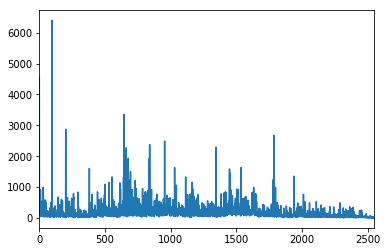

In [27]:
ted.comments.plot()

# x-axis = index value
# y-axis = number of comments for each row

A line plot is not something that we would use here. A line plot is used to measure something over TIME.
If there is not a line component to it, then we should not use line plot.

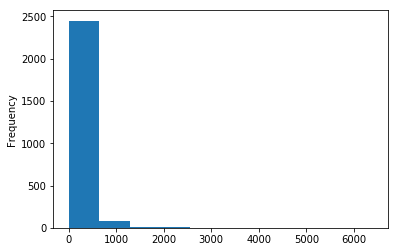

In [28]:
## Step 1: We have to select the type of plot we want to use ted.comments.plot(shift+tab) to see the kind of plot we want
## Step 2: Change the defaults to make the plot as informative as possible

## This is a freq distribution problem. Frequency dist means how many times a single value has appeared.
## Histogram is the best graph for frequency distribution


ted.comments.plot(kind= 'hist')

# x-axis = number of comments
# y-axis = index number

####### Still we dont have the idea about how the distribution looks like within the first high tower.
From the graph, we realize Majority of the talks have received nearly 650 comments

In order to make the graph more informative, we will filter it down. 

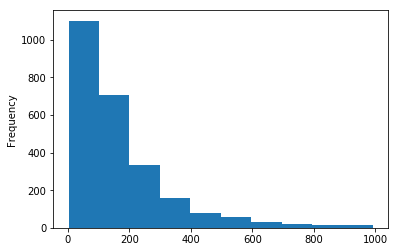

In [30]:
ted[ted.comments<1000].comments.plot(kind="hist")

In [31]:
# Hence by getting the talks with a less than 1000 comments, we have lost very few data. To be precise, we lost 32 data points

ted[ted.comments >= 1000].shape

(32, 19)

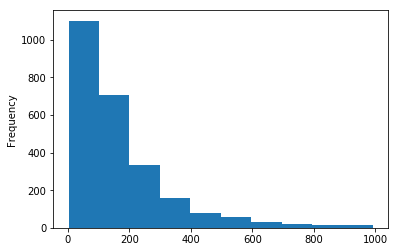

In [32]:
# We can also plot the same graph using .loc

ted.loc[ted.comments < 1000, 'comments'].plot(kind = "hist")

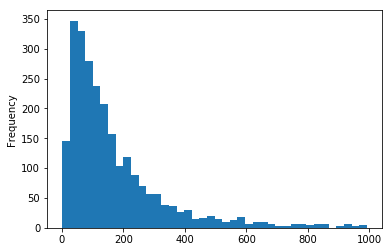

In [33]:
# We can also increase the number of bins to get a more clear picture

ted.loc[ted.comments < 1000, 'comments'].plot(kind = "hist", bins = 40)

##### Best take away from lesson 2: Vizualize the distribution of comments

1. Choose your plot type based on the question you are answering and the data type you are working with.

2. Use pandas one liners to iterate through plots quickly.

3. Try modifying the plot defaults

4. Creating plot involves decision making. (eg: leaving the 32 outliers with more than 1000 comments)

In [35]:
##### 4. Plot the number of talks that took place each year

In [36]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,10372.745443
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,12077.433962
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,13195.903226
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,8487.750000
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,20245.984823


In [37]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comment'],
      dtype='object')

In [38]:
# Lets see if film date column can help us get the desired result. From kaggle website, we can see that film date column is a 
# Unix time stamp

ted.film_date.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64

In [40]:
# pd.to_Datetime will convert a series to date time format.
pd.to_datetime(ted.film_date).head()

# This does not seem to be a good date time format.

0   1970-01-01 00:00:01.140825600
1   1970-01-01 00:00:01.140825600
2   1970-01-01 00:00:01.140739200
3   1970-01-01 00:00:01.140912000
4   1970-01-01 00:00:01.140566400
Name: film_date, dtype: datetime64[ns]

In [49]:
# Google search for pd.to_datetime and then search for unix format

ted["film_datetime"] = pd.to_datetime(ted.film_date, unit = 's')

In [50]:
# We will check if the time-stamp is correct or not
ted[["event", "film_datetime"]].sample(5)

,event,film_datetime
801,TEDGlobal 2010,2010-07-14
1236,TEDxAustin,2012-02-11
609,TEDMED 2009,2009-10-10
791,Fort Worth City Council,2010-10-12
305,EG 2007,2007-12-12


In [51]:
ted.dtypes

comments                       int64
description                   object
duration                       int64
event                         object
film_date                      int64
languages                      int64
main_speaker                  object
name                          object
num_speaker                    int64
published_date                 int64
ratings                       object
related_talks                 object
speaker_occupation            object
tags                          object
title                         object
url                           object
views                          int64
comments_per_view            float64
views_per_comment            float64
film_datetime         datetime64[ns]
dtype: object

In [54]:
# As the series has a datetime dtype, we can do alot of things in this series

ted.film_datetime.dt.year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: film_datetime, dtype: int64

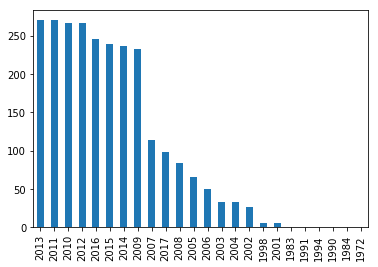

In [55]:
ted.film_datetime.dt.year.value_counts().plot(kind = "bar")

#This plot can be a little misleading as it does not show the years in which talks were not held. For eg: 1973, 1980, 1981 etc.
# Bar plots are best for Categorical data.

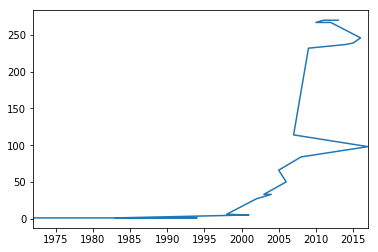

In [59]:
## We will try the line plot now.

ted.film_datetime.dt.year.value_counts().plot()

## What went wrong here?? It is a sorting issue.
## We have to sort the index and not the values, coz index takes the x-axis

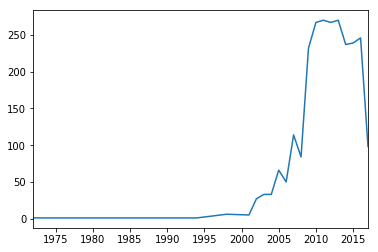

In [60]:
ted.film_datetime.dt.year.value_counts().sort_index().plot()

##### There is a sharp dip after 2015. Does that mean that talks are decreasing after 2015??

No. This because the data is incomplete after 2015 

###### Best take-away from lesson 4: Plot the number of talks that took place each year.

1. Read the documentation (pandas documentation and vizualization documents)
2. Use the datetime datatype for dates and time
3. Check your work as you go (eg. took a sample of events and film_datetime to check if the dates match the event date)
4. Consider excluding data if it might not be relevant.

##### 5. What were the "Best" events in the TED history to attend??

In [61]:
## First we have to define what does best mean to us and then use that definition to calculate the best event.

In [62]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'comments_per_view', 'views_per_comment',
       'film_datetime'],
      dtype='object')

In [65]:
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [66]:
# We can startoff with number of views. If the event has highest number of views online, it might be best event.

In [68]:
ted.groupby('event').views.mean().sort_values().tail()

# The template for using a groupby is:
#For each event, we want to do some aggregation function on the column.

event
TEDxNorrkoping        6569493.0
TEDxCreativeCoast     8444981.0
TEDxBloomington       9484259.5
TEDxHouston          16140250.5
TEDxPuget Sound      34309432.0
Name: views, dtype: float64

In [ ]:
# Some of the events had very few talks. So the avg views for these events might be less.
# We want to know how many talks were there for each event.We have to use .agg() method

In [71]:
ted.groupby('event').views.agg(["count", "mean"]).sort_values('mean').tail()

,count,mean
event,,
TEDxNorrkoping,1,6569493.0
TEDxCreativeCoast,1,8444981.0
TEDxBloomington,2,9484259.5
TEDxHouston,2,16140250.5
TEDxPuget Sound,1,34309432.0


In [72]:
## From the count we see that TEDxPuget Sound had only one talk and hence it cannot be said that it was the best event.

In [75]:
# Lets try for sum of views received for the event online

ted.groupby('event').views.agg(["count", "mean", "sum"]).sort_values('sum').tail()

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


##### Best take away from lesson 5: What were the "best" events in TED history to attend??

1. Think creatively about how you can use the data that you have to answer your question.
(Very very few times we will have the perfect data to answer our question. So when we use the creative way, always acknowledge the weekness of our approach)


2. Watch out for small sample sizes. (Use count with mean to find meaningless means.)

##### 6. Unpack the ratings data.

In [22]:
import pandas as pd

In [23]:
ted = pd.read_csv("C:/Users/Ashish/Desktop/Python Tutorials/CSV files/ted_main.csv")
ted.ratings.head() # The audience used to rate the talks as funny, boring, courageous etc..

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [24]:
ted.loc[0, "ratings"]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [25]:
type(ted.loc[0, "ratings"]) # The above row of ratings is a stringified list of dictionaries.

str

In [26]:
import ast #[ast stands for abstract syntax tree]

In [27]:
# It has a module called literal eval

ast.literal_eval('[1,2,3]')

[1, 2, 3]

In [28]:
type(ast.literal_eval('[1,2,3]'))

# We passed literal_eval a string that looks like a list and literal_val returned a list

list

literal_eval allows you to evaluate a string containing a python literal or container. So if we have stringified integer then we can use it, if we have stringified list then we can use it. Thats the magic of it

In [29]:
#We shall use it to unpack the ratings section.

ast.literal_eval(ted.loc[0,"ratings"])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [30]:
type(ast.literal_eval(ted.loc[0,"ratings"])) #The string has been converted to a list

list

In [31]:
# We have applied this just for a single cell of ratings. We have to apply the same for the entire series of ratings
# We will create a function that converts str to list

def str_to_list (ratings_str):
    return ast.literal_eval(ratings_str)

In [45]:
# We shall now test if the function works properly.

str_to_list(ted.loc[0,"ratings"])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [46]:
# Now we shall apply the function to every element of the ratings series

ted.ratings.apply(str_to_list).head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [47]:
# Lambda version of the above command

ted.ratings.apply(lambda x: ast.literal_eval(x)).head()

# The basic format of lambda:
# lambda x: The x just becomes every element of the series. For each element in the series, do the following thing to it.

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [48]:
#We will now create a seperate column 

ted["ratings_list"] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [49]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [50]:
# In this exercise, our aim was to take the ratings string and convert it to ratings list

type(ted.ratings_list[0])

list

In [51]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
ratings_list          object
dtype: object

Best take away from lesson 6: Unpack the ratings data
    
    1. Pay attention to the datatypes in Pandas
    
    2. Use .apply any time its necessary 
    (first try all the built_in pandas function. If that does not work, only then go for apply as apply is much slower than     built_in pandas functions)

##### 7. Count the total number of ratings received by each talk.

- put it in new column called 'num_ratings'

In [52]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [59]:
def get_num_ratings(list_of_dicts):
    num = 0
    for d in list_of_dicts:
        num = num + d["count"]
    return num

In [60]:
get_num_ratings(ted.ratings_list[0])

93850

In [63]:
ted["num_ratings"] = ted.ratings_list.apply(get_num_ratings)

In [64]:
ted.num_ratings.describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

##### Best take away from Lesson 7: Count the total number of ratings received by each talk

1. Write your code in small chunks and check your work as you go.

2. Lamdas is best for simple functions

###### 8. Which occupations deliver the funniest TED talk on average?

In [65]:
## Step 1: Count the number of funny ratings

In [66]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [67]:
ted.ratings.str.contains("Funny").value_counts()

#Therefore, all the ratings contain funny in their list

True    2550
Name: ratings, dtype: int64

In [69]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d["name"] == "Funny":
            return d["count"]

In [71]:
ted["funny_ratings"] = ted.ratings_list.apply(get_funny_ratings)

In [73]:
ted.funny_ratings.head()

0    19645
1      544
2      964
3       59
4     1390
Name: funny_ratings, dtype: int64

In [74]:
## Now we shall calculate in percentage, how funny was that talk

ted["funny_rate"] = ted.funny_ratings / ted.num_ratings

In [75]:
ted.funny_rate.head()

0    0.209323
1    0.185286
2    0.341360
3    0.015826
4    0.054254
Name: funny_rate, dtype: float64

In [76]:
## How do we spot check that this calculation makes sense??

ted.sort_values("funny_rate").speaker_occupation.tail(10)

568                        Comedian
675                  Data scientist
21             Humorist, web artist
194                        Jugglers
2273            Comedian and writer
2114            Comedian and writer
173                        Investor
747                        Comedian
1398                       Comedian
685     Actor, comedian, playwright
Name: speaker_occupation, dtype: object

In [77]:
## Step 2: Analyse the funny rate by occupation.

ted.groupby("speaker_occupation").funny_rate.mean().sort_values().tail()

##For each something, I want to take an aggregation function of some other column

speaker_occupation
Comedian                       0.512457
Actor, writer                  0.515152
Actor, comedian, playwright    0.558107
Jugglers                       0.566828
Comedian and writer            0.602085
Name: funny_rate, dtype: float64

In [78]:
# The problem with this calculation is that many of these occupations have a very small sample size.

ted.speaker_occupation.describe()

count       2544
unique      1458
top       Writer
freq          45
Name: speaker_occupation, dtype: object

In [79]:
##There are 1458 unique values hence the sample size is very small

In [83]:
## Step 3: Focus on occupations that are well represented in the data.

ted.speaker_occupation.value_counts()

pandas.core.series.Series

In [84]:
## Save the above command as occupation counts 

occupation_counts = ted.speaker_occupation.value_counts()

In [85]:
occupation_counts[occupation_counts >= 5]

Writer                                        45
Designer                                      34
Artist                                        34
Journalist                                    33
Entrepreneur                                  31
Architect                                     30
Inventor                                      27
Psychologist                                  26
Photographer                                  25
Filmmaker                                     21
Neuroscientist                                20
Educator                                      20
Author                                        20
Economist                                     20
Roboticist                                    16
Philosopher                                   16
Biologist                                     15
Physicist                                     14
Musician                                      11
Marine biologist                              11
Global health expert

In [86]:
# Now we will take the index from the above result and save it as top_occupations

top_occupations = occupation_counts[occupation_counts >= 5].index

In [89]:
top_occupations # THis can be treated as a list of occupations that has appeared atleast 5 times.

Index(['Writer', 'Designer', 'Artist', 'Journalist', 'Entrepreneur',
       'Architect', 'Inventor', 'Psychologist', 'Photographer', 'Filmmaker',
       'Neuroscientist', 'Educator', 'Author', 'Economist', 'Roboticist',
       'Philosopher', 'Biologist', 'Physicist', 'Musician', 'Marine biologist',
       'Global health expert; data visionary', 'Activist', 'Technologist',
       'Behavioral economist', 'Astronomer', 'Poet', 'Oceanographer',
       'Singer/songwriter', 'Historian', 'Graphic designer', 'Philanthropist',
       'Social psychologist', 'Novelist', 'Computer scientist', 'Futurist',
       'Engineer', 'Astrophysicist', 'Mathematician', 'Comedian',
       'Singer-songwriter', 'Legal activist', 'Techno-illusionist',
       'Writer, activist', 'Social entrepreneur', 'Climate advocate',
       'Reporter', 'Performance poet, multimedia artist', 'Photojournalist',
       'Evolutionary biologist', 'Game designer',
       'Investor and advocate for moral leadership', 'Researcher', 'P

In [94]:
# We will filter the dataframe and will only include rows with occupation >= 5

ted_top_occupation = ted[ted.speaker_occupation.isin(top_occupations)]

In [97]:
ted_top_occupation.groupby("speaker_occupation").funny_rate.mean().sort_values().tail()

speaker_occupation
Data scientist                         0.184076
Producer                               0.202531
Singer/songwriter                      0.252205
Performance poet, multimedia artist    0.306468
Comedian                               0.512457
Name: funny_rate, dtype: float64

Best take away from lesson 8: Which occupations deliver the funniest TED talk on average?

1. Check for assumptions for your data.
2. Check whether your results are reasonable
3. Take advantage of the fact that pandas operation often output a dataframe or a series
4. Watch out for small sample sizes
5. Consider the impact of missing data
6. Data Scientists are hilarious.